# C-N Benchmark Visualization

In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
from cn_benchmark_visualization import DomainWrapper
from summit.benchmarks import BaumgartnerCrossCouplingEmulator_Yield_Cost
from summit.strategies import Random
from summit.utils.multiobjective import hypervolume, pareto_efficient

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Pareto Frontpareto_efficient

In [ ]:
exp = BaumgartnerCrossCouplingEmulator_Yield_Cost()
exp.domain

In [33]:
def random_test(n_points, random_seed, hypervolume_ref=[0,1]):
    rand = Random(exp.domain, 
                  random_state=np.random.RandomState(random_seed))
    experiments = rand.suggest_experiments(n_points)
    exp.reset()
    exp.run_experiments(experiments)
    
    # Pareto front
    clear_output(wait=True)
    fig, ax = exp.pareto_plot()
    pareto_data = exp.pareto_data[['yld', 'cost']].to_numpy()
    pareto_data[:,0] *= -1.0 # change yld to minimization
    
    # Hypervolume
    hv = hypervolume(pareto_data, hypervolume_ref)
    
    #Formatting
    fig.suptitle(f'{n_points} points, hypervolume={hv}')
    plt.show()
    
    return hv

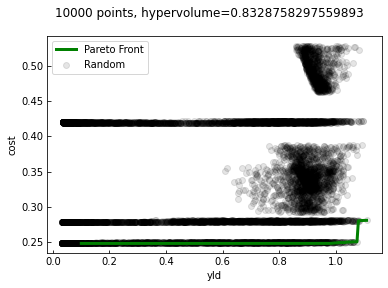

In [34]:
points = [100, 1000, 5000, int(1e4)]
hvs = []
for n_points in points:
    hvs.append(random_test(n_points, 100))

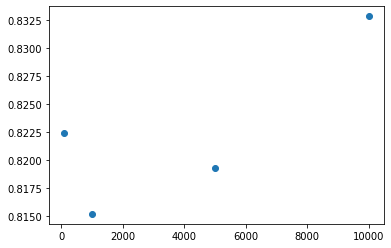

In [35]:
plt.scatter(points, hvs)

In [36]:
print(hvs)

[0.8224231431751589, 0.8151680341841179, 0.8192679177963309, 0.8328758297559893]
